# Project Title : Seoul Bike Sharing Demand Prediction

# Problem Description
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information


***

# Attribute Information:

* **Date** : year-month-day
* **Rented Bike Count** - Count of bikes rented at each hour
* **Hour** - Hour of the day
* **Temperature** - Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc (Non-Functional Hours), Fun (Functional hours)

## Data Preparation

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='latin1')

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
df.shape

(8760, 14)

In [7]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


## Data Preprocessing


In [8]:
#Extracting Weekends

df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
df['Day'] = df['Date'].dt.day_name()

## Extracting Weekends
Extracting the day of the week is a common and useful step in time-series or date-based data analysis because the day of the week can significantly influence patterns in the data.

In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


In [10]:
df['Day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [11]:
df['Weekend'] = df['Day'].apply(lambda x:1 if x == 'Sunday' or x == 'Saturday' else 0)

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0


In [13]:
## Extarcting month and year now

df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [14]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Weekend,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017


In [15]:
from pandas.api.types import CategoricalDtype
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

month_cat_type = CategoricalDtype(categories = month_order, ordered=True)
df['Month'] = df['Month'].astype(month_cat_type)

By converting the 'Month' column to a categorical type with a specified order, you ensure that the months are treated as ordered categories rather than just strings. This is particularly useful for visualizations and analyses where the chronological order of months is important (e.g., plotting trends over the year).

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Weekend,Month,Year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,0,December,2017


## Expoatory Data Analysis

Bike Count Over Months

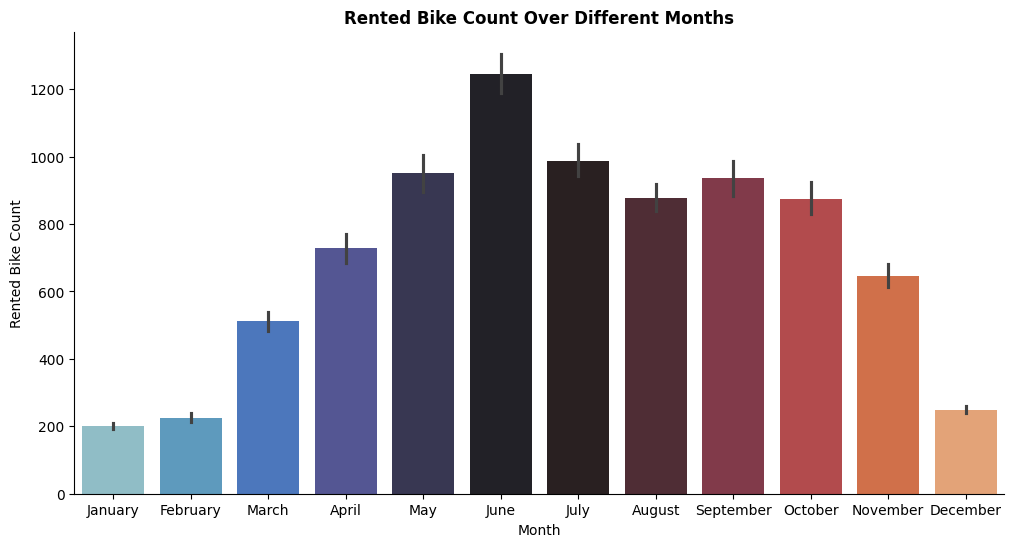

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Rented Bike Count', data=df, palette = 'icefire')
plt.title('Rented Bike Count Over Different Months', fontweight = 'bold')
sns.despine()
plt.show()

Bike Count over Seasons

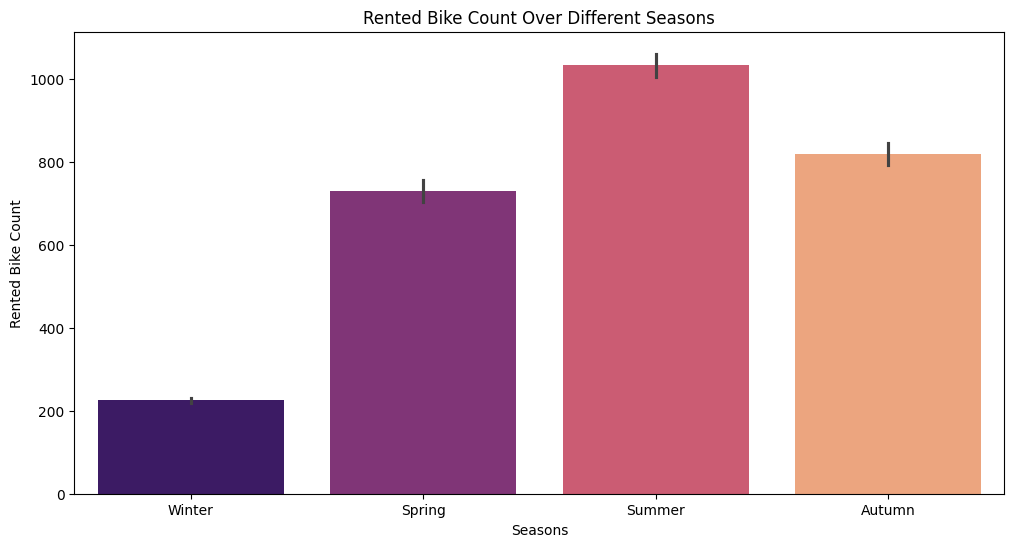

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='Seasons', y='Rented Bike Count', data=df, palette='magma')
plt.title('Rented Bike Count Over Different Seasons')
plt.show()

Bike Count Over Holidays

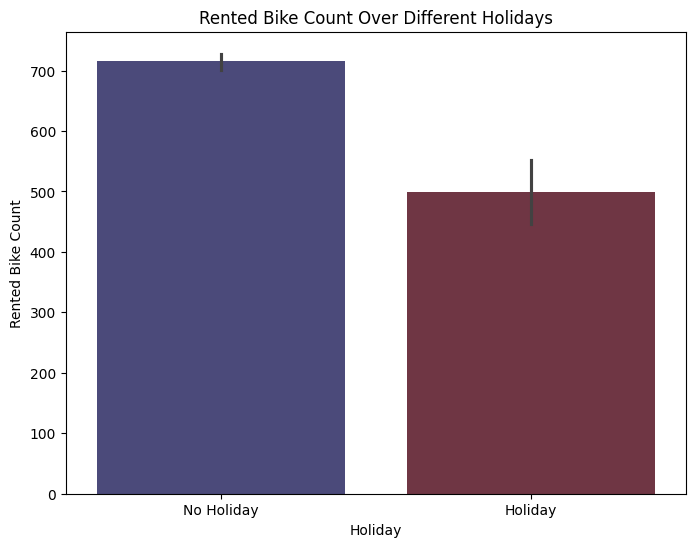

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df, palette='icefire')
plt.title('Rented Bike Count Over Different Holidays')
plt.show()

Bike Count Over Days

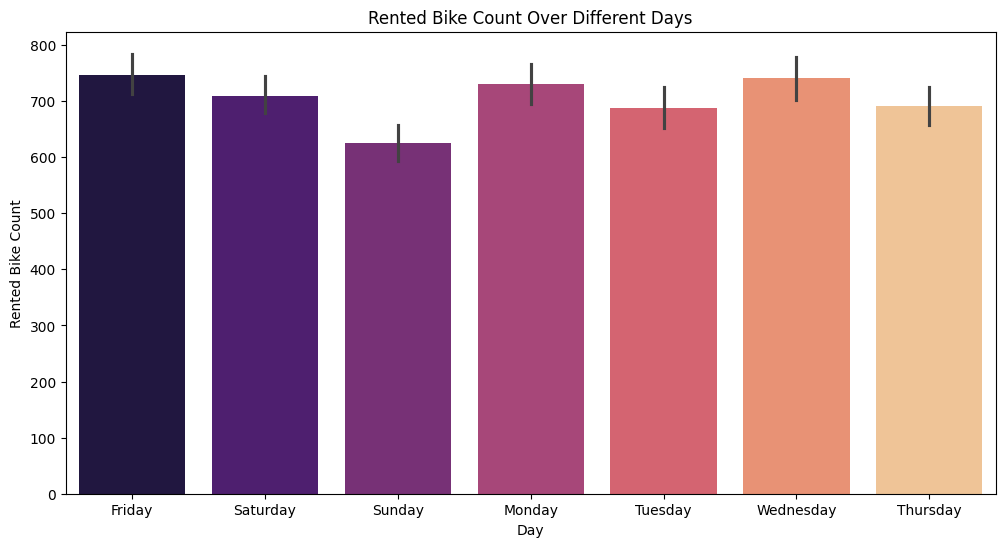

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day', y='Rented Bike Count', data=df , palette='magma')
plt.title('Rented Bike Count Over Different Days')
plt.show()

Bike Count Over Weekends

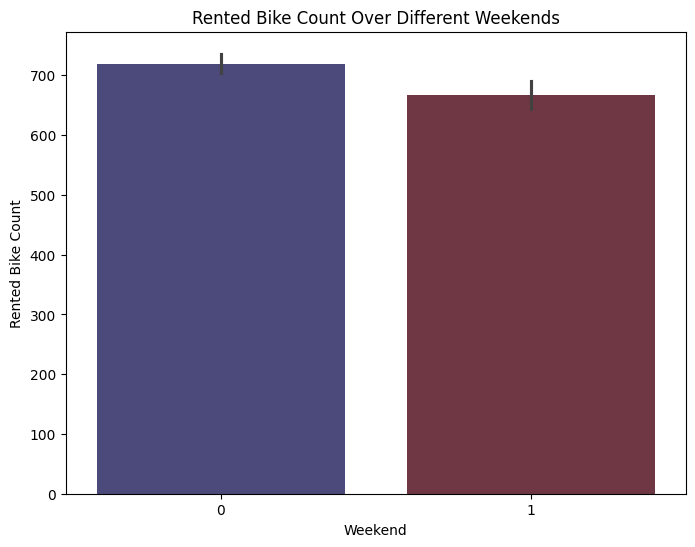

In [21]:
plt.figure(figsize =(8,6))
sns.barplot(x='Weekend', y='Rented Bike Count', data=df, palette='icefire')
plt.title('Rented Bike Count Over Different Weekends')
plt.show()


Rented Bike Count Over Hours

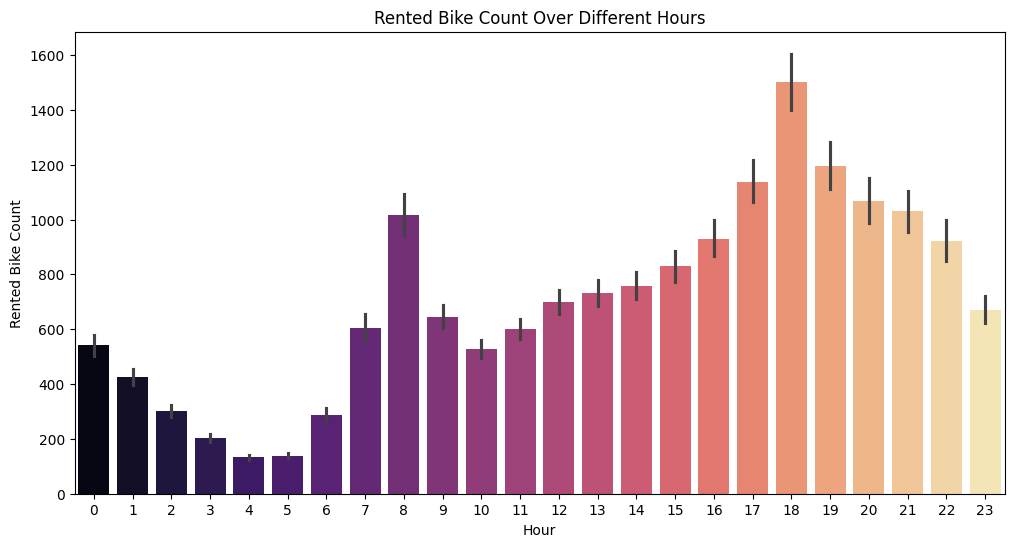

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='Hour', y='Rented Bike Count', data=df, palette ='magma')
plt.title('Rented Bike Count Over Different Hours')
plt.show()

Dropping Unwanted Columns & Saving it into new dataframe

In [23]:
df1 = df.drop(['Date','Day','Month','Year'],axis = 1)

In [24]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekend                    8760 non-null   int64

Checking All numerical columns with distplot

In [26]:
numeric_feature = df1.select_dtypes(include=['int64','float64']).columns
numeric_feature

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekend'],
      dtype='object')

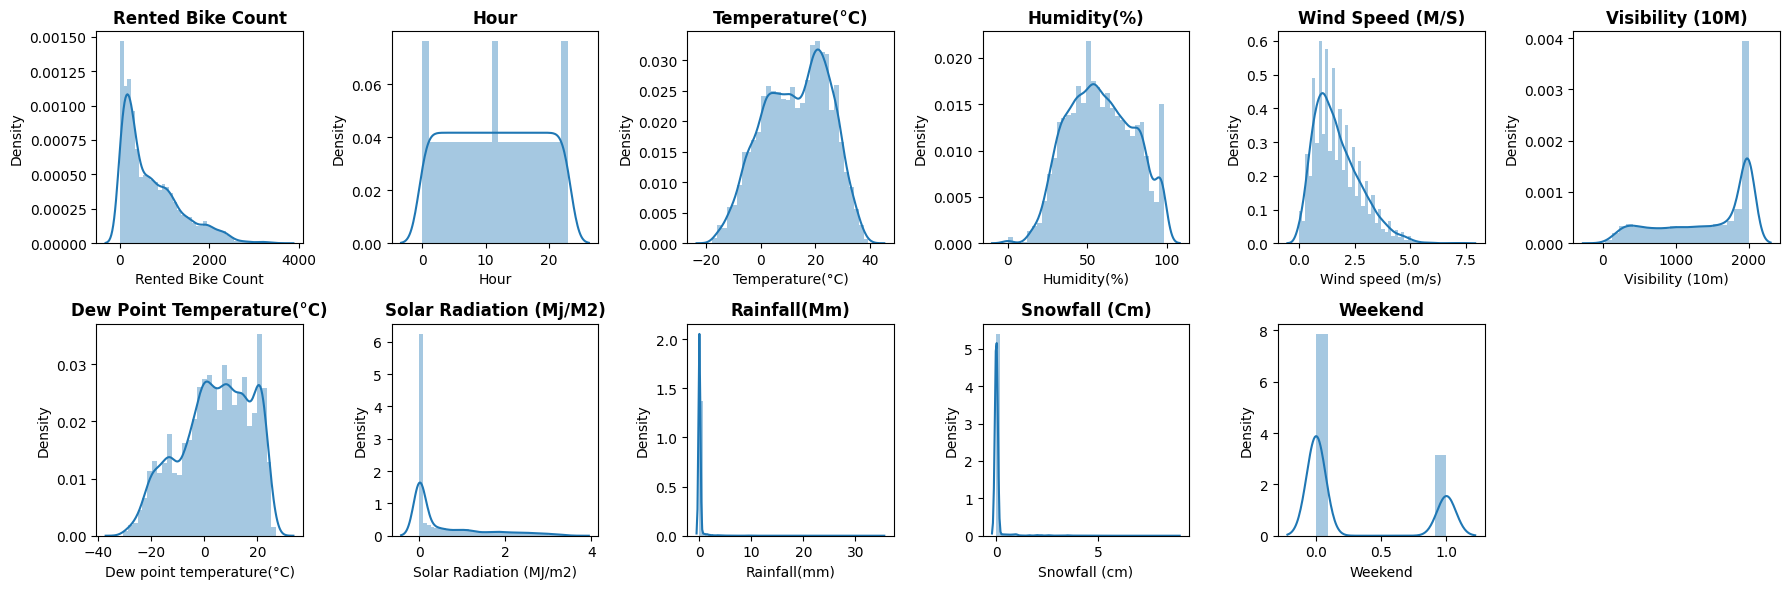

In [27]:
#Distribution
plt.figure(figsize=(18,6))
for n, column in enumerate ( df1.describe().columns):
    plt.subplot(2,6,n+1)
    sns.distplot(df1[column])
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

Outliers

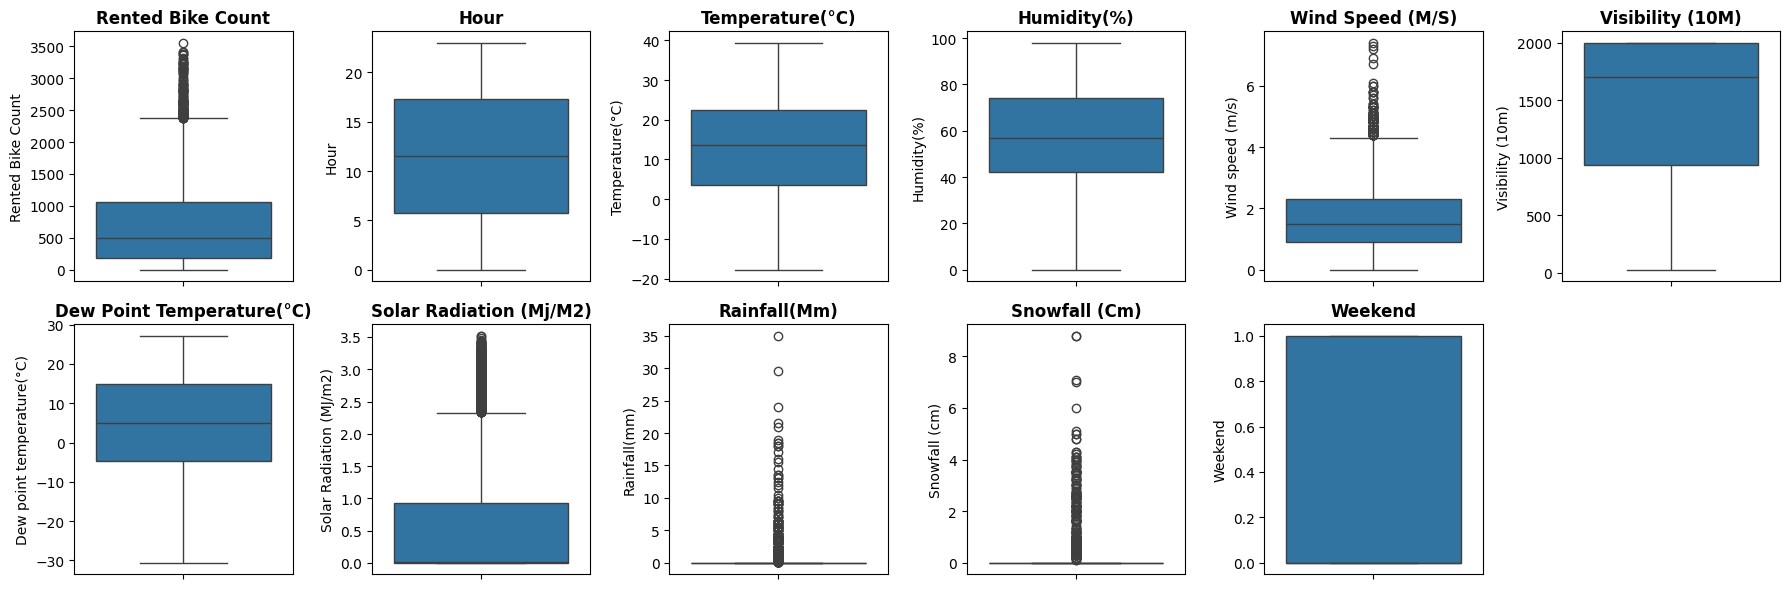

In [28]:
plt.figure(figsize=(18,6))
for n, column in enumerate(df1.describe().columns):
  plt.subplot(2,6,n+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}', weight ='bold')
  plt.tight_layout()

From Above two graphs we can see there are so many outliers , we will need some transformation

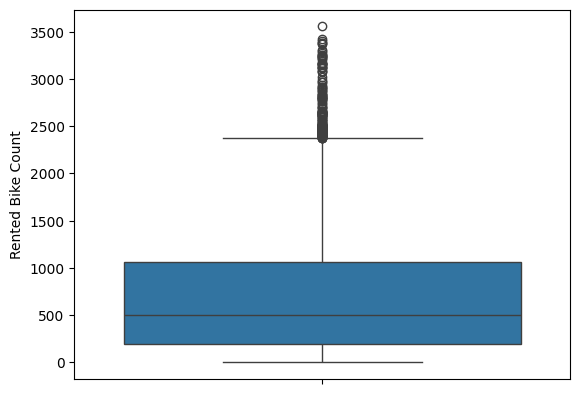

In [29]:
sns.boxplot(df1['Rented Bike Count'])
plt.show()

<Figure size 800x600 with 0 Axes>

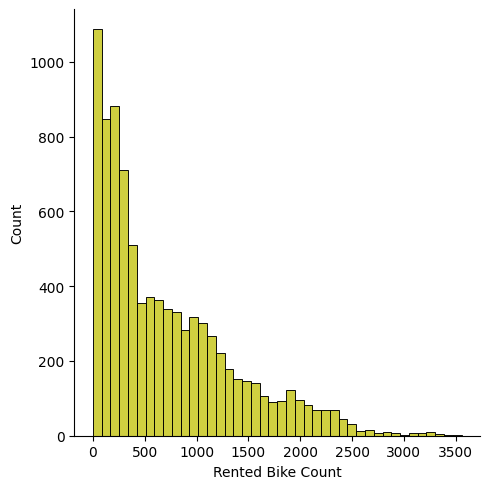

Skewness: 1.1534281773679014


In [30]:
plt.figure(figsize=(8,6))
sns.displot((df['Rented Bike Count']), color='y')
plt.show()
print('Skewness:', df['Rented Bike Count'].skew())

<Figure size 900x600 with 0 Axes>

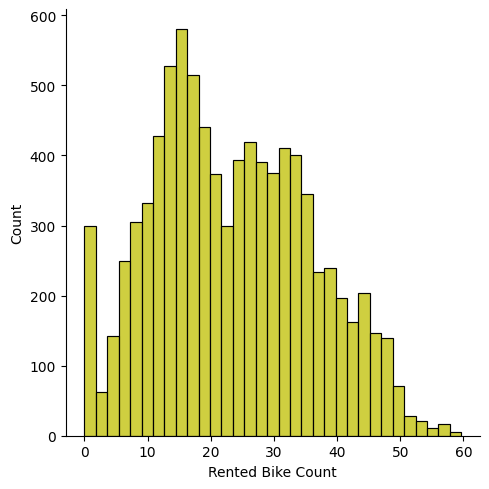

Skewness: 0.237362090985412


In [31]:
plt.figure(figsize=(9,6))
sns.displot(np.sqrt(df['Rented Bike Count']), color='y')
plt.show()
print('Skewness:', np.sqrt(df['Rented Bike Count']).skew())

Seeing the distribution helps us understand how the data is spread. Is it symmetrical, or is it skewed to one side? This can inform decisions about which statistical models to use or if data transformations are needed.

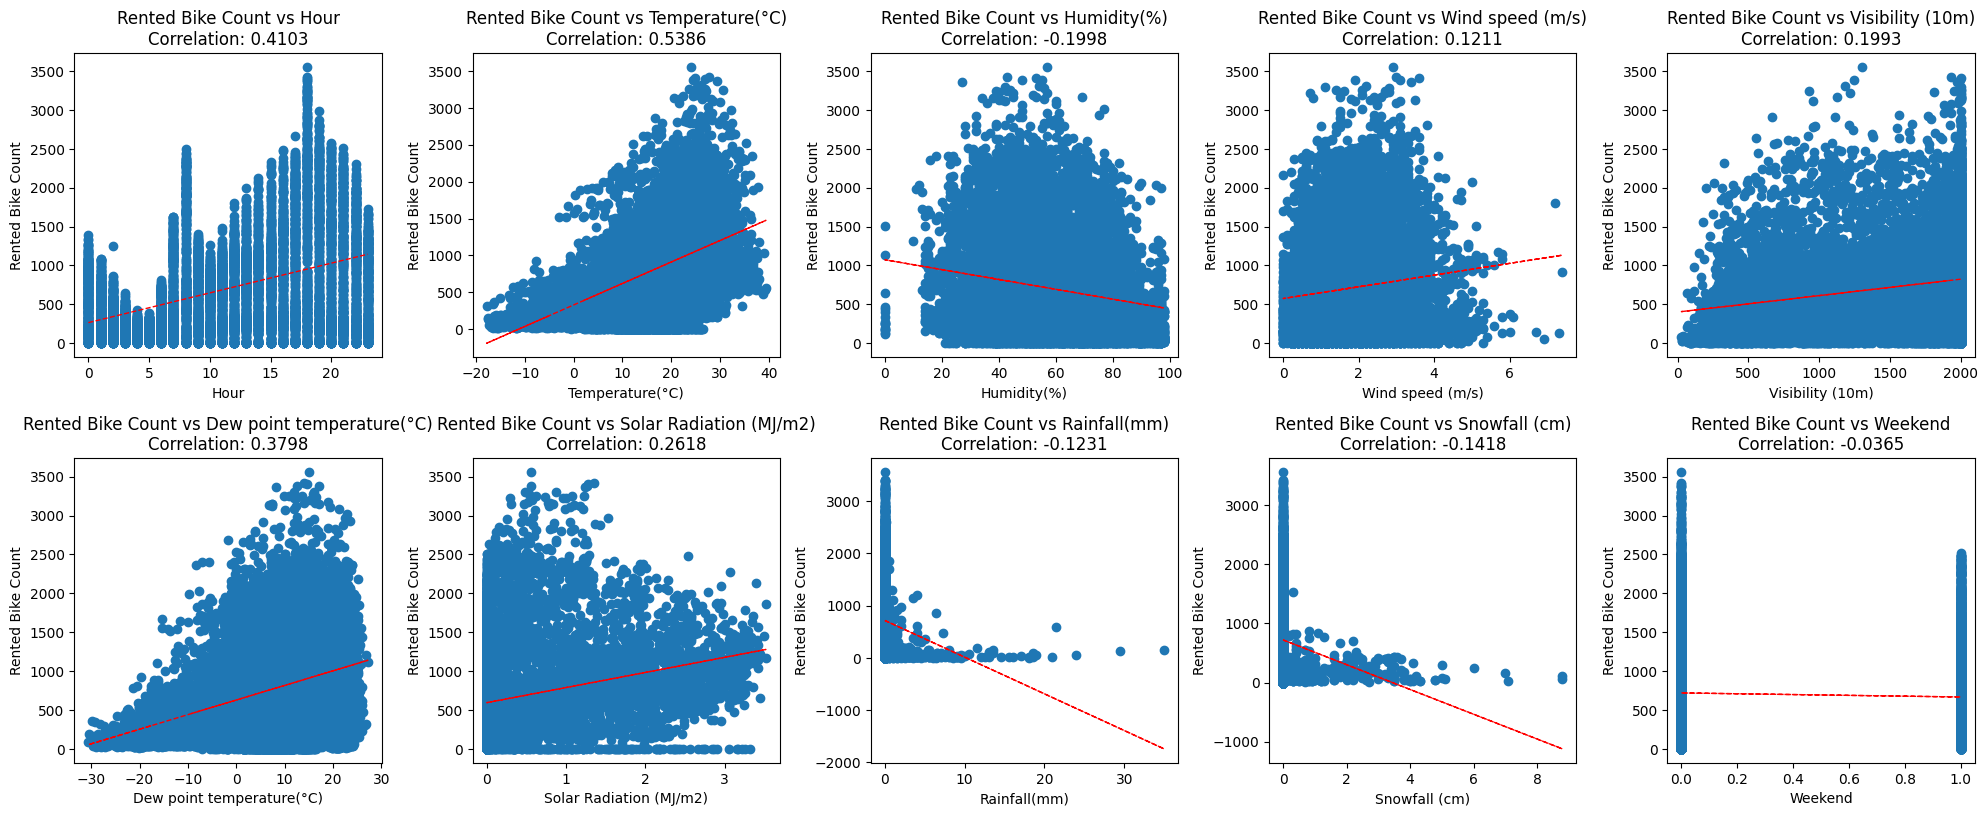

In [32]:
import matplotlib.pyplot as plt
import numpy as np

features_to_plot = numeric_feature[1:]
num_features = len(features_to_plot)
target_col = 'Rented Bike Count'

rows = 5
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()


for i, col in enumerate(features_to_plot):

    if i >= len(axes):
        break

    ax = axes[i]


    feature = df[col]
    label = df[target_col]
    correlation = feature.corr(label)

    ax.scatter(x=feature, y=label)
    ax.set_xlabel(col)
    ax.set_ylabel(target_col)
    ax.set_title(f'{target_col} vs {col}\nCorrelation: {correlation:.4f}')


    z = np.polyfit(df[col], df[target_col], 1)
    p = np.poly1d(z)
    ax.plot(df[col], p(df[col]), "r--", lw=1)


for j in range(num_features, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

plt.show()

In [34]:
df.corr(numeric_only=True)['Rented Bike Count']

,Rented Bike Count
Rented Bike Count,1.000000
Hour,0.410257
Temperature(°C),0.538558
Humidity(%),-0.199780
Wind speed (m/s),0.121108
Visibility (10m),0.199280
Dew point temperature(°C),0.379788
Solar Radiation (MJ/m2),0.261837
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


# Correlation Heatmap

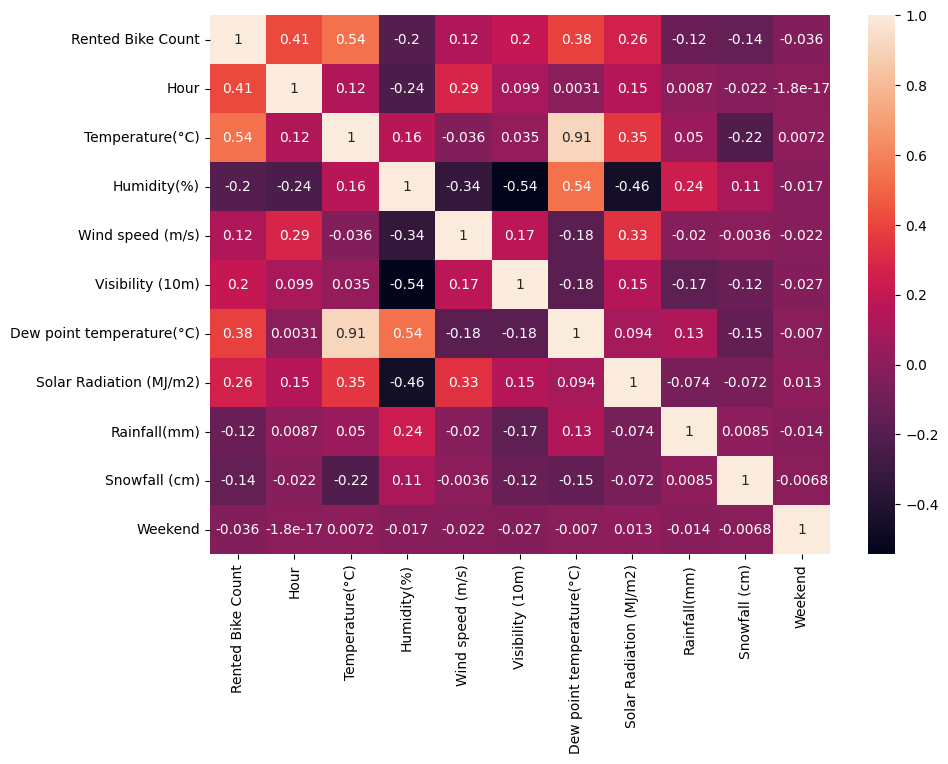

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

Temperature & Dew Point Temperature are highly correlated

In [36]:

#Dropping Column

df2 = df1.drop(['Temperature(°C)'],axis = 1)

In [37]:
df2.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekend
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
1,204,1,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
2,173,2,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0
3,107,3,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0
4,78,4,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0


# Removing Multi-colinearity

In [38]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['Variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
    return (vif)

calc_vif(df2[[i for i in df2.describe().columns if i not in ['Rented Bike Count']]])

,Variables,VIF
0,Hour,3.855654
1,Humidity(%),5.462400
2,Wind speed (m/s),4.730040
3,Visibility (10m),4.980916
4,Dew point temperature(°C),1.663850
5,Solar Radiation (MJ/m2),1.925305
6,Rainfall(mm),1.080447
7,Snowfall (cm),1.111735
8,Weekend,1.384555


The VIF measures how strongly the independent variables are correlated. By regressing one variable against each other and the dependent variable, it is predicted. How well a variable is explained by other independent variables is indicated by its VIF score

VIF = 1: No correlation.

1 < VIF < 5: Moderate correlation, often acceptable.

VIF > 5 or 10: High correlation, which is likely problematic and should be addressed by removing one of the correlated features.

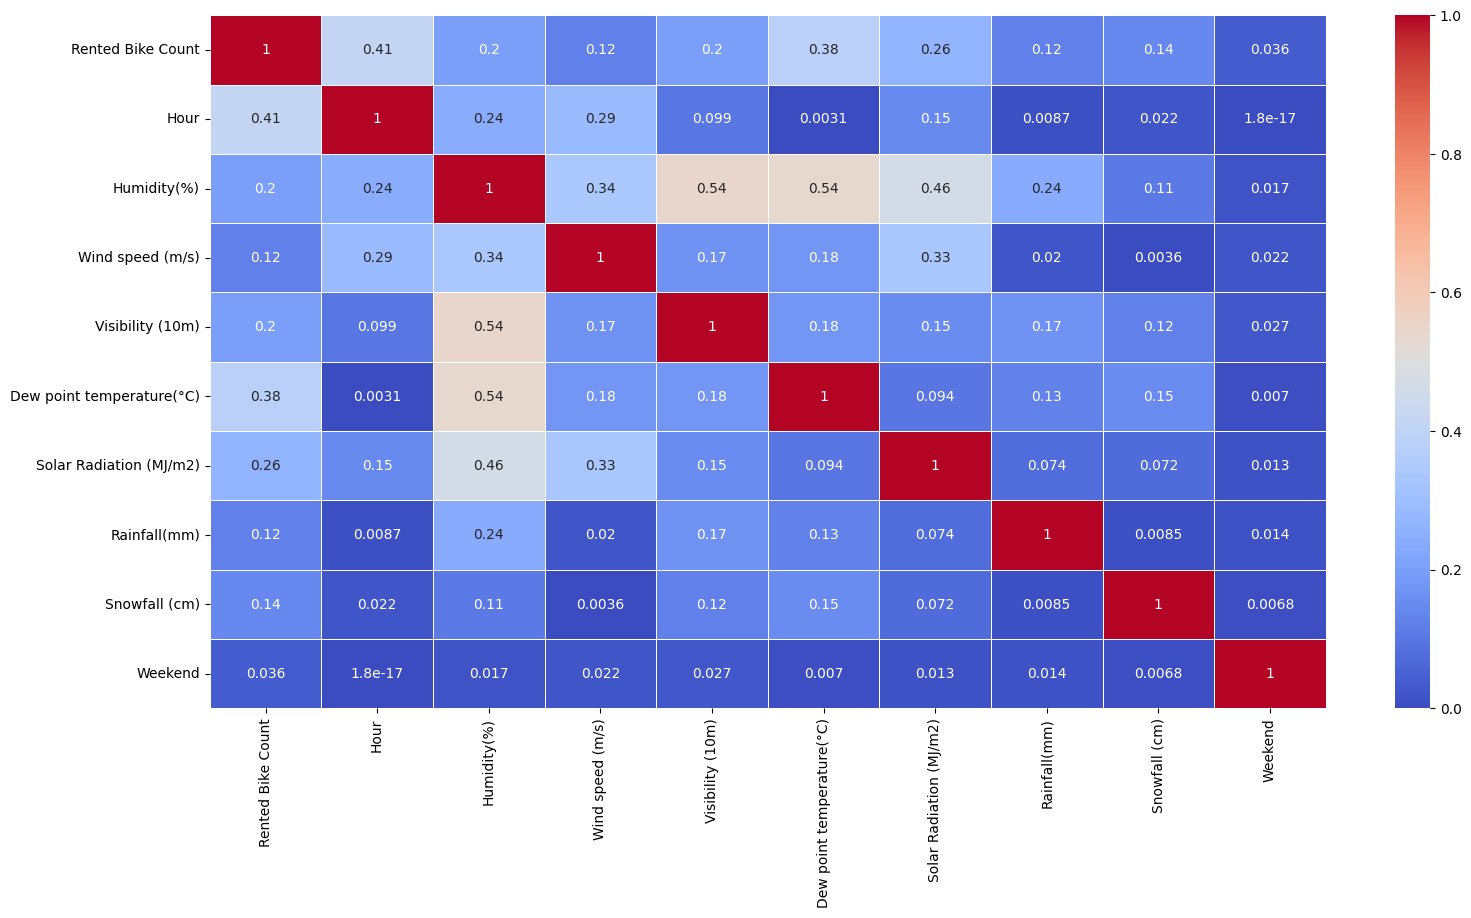

In [39]:
plt.figure(figsize=(18,9))
sns.heatmap(abs(df2.corr(numeric_only=True)), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [40]:
#OneHot Encoding

df3 = pd.get_dummies(df1,columns = ['Seasons','Holiday','Functioning Day'],drop_first= True)

In [41]:
df3.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,False,False,True,True,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,False,False,True,True,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,False,False,True,True,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,False,False,True,True,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,False,False,True,True,True


In [42]:
#Extracting x & y values for train and test split

X = df3.iloc[:,1:].values
y = df3.iloc[:,0].values

In [43]:
X

array([[0, -5.2, 37, ..., True, True, True],
       [1, -5.5, 38, ..., True, True, True],
       [2, -6.0, 39, ..., True, True, True],
       ...,
       [21, 2.6, 39, ..., False, True, True],
       [22, 2.1, 41, ..., False, True, True],
       [23, 1.9, 43, ..., False, True, True]], dtype=object)

In [44]:
y

array([254, 204, 173, ..., 694, 712, 584])

In [45]:
#Converting y into sqrt
y = np.sqrt(y)
y

array([15.93737745, 14.28285686, 13.15294644, ..., 26.34387974,
       26.68332813, 24.16609195])

# Train Test Split Model
Data division into Train and Test: The data will now be divided into TRAIN and TEST (80:20 ratio) For this, we'll utilise the train test split method from the sklearn package.

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [47]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7008, 15)
(7008,)
(1752, 15)
(1752,)
